In [2]:
import gzip
from tqdm.notebook import tqdm
propFileDict = {}
fileLineCount = 1149471184
with gzip.open('../../gdrive-kgtk-dump-2020-12-07/claims.tsv.gz','r') as fin: 
    headerLine = next(fin).decode("utf-8")
#     tstCount = 0
    for line in tqdm(fin, total = fileLineCount):
        line = line.decode("utf-8")
        lineP = line.rstrip().split("\t")
        if "external-id" in lineP[-1]:
            continue
        prop = lineP[2]
        if prop not in propFileDict:
            propFileDict[prop] = open("../../propertiesSplitWRemoved3/claims."+str(prop)+".tsv","w")
            propFileDict[prop].write(headerLine)
        propFileDict[prop].write(line)
#         tstCount += 1
#         if tstCount == 10:
#             break
    for file1 in propFileDict.values():
        file1.close()

  0%|          | 0/1149471184 [00:00<?, ?it/s]

In [2]:
!kgtk --debug query -i ../../propertiesSplit/claims.P996.tsv \
    ../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), c: (rLabel)-[:P2308]->(parent), d: (node1)-[]->(par), c: (eLabel)-[:P2303]->(eNode)" \
    --where 'nodeProp.label = rLabel and (par = parent or (rLabel = eLabel and node1 = eNode))' \
    --return 'nodeProp.id, node1, nodeProp.label, node2, max(parent) as `node1;ancestor`' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.all.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 19:33:50 sqlstore]: IMPORT graph directly into table graph_11 from /data/wd-correctness/propertiesSplit/claims.P996.tsv ...
[2021-03-12 19:33:51 sqlstore]: IMPORT graph directly into table graph_12 from /data/wd-correctness/wikidata-20210215/derived.isastar.tsv.gz ...
^C


In [4]:
!kgtk --debug query -i ../../propertiesSplit/claims.P996.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q1238720","Q3331189","Q47461344"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P996.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 22:33:26 query]: SQL Translation:
---------------------------------------------
  SELECT graph_11_c1."id", graph_11_c1."node1", graph_11_c1."label", graph_11_c1."node2"
     FROM graph_11 AS graph_11_c1, graph_14 AS graph_14_c2
     WHERE graph_11_c1."node1"=graph_14_c2."node1"
     AND (graph_14_c2."node2" IN (?, ?, ?))
  PARAS: ['Q1238720', 'Q3331189', 'Q47461344']
---------------------------------------------


In [7]:
!wc -l ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv

81289 ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv


In [8]:
!kgtk --debug query -i ../../propertiesSplit/claims.P991.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q40231"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P991.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.incorrect.tsv

[2021-03-12 22:49:54 sqlstore]: IMPORT graph directly into table graph_15 from /data/wd-correctness/propertiesSplit/claims.P991.tsv ...
[2021-03-12 22:49:54 query]: SQL Translation:
---------------------------------------------
  SELECT graph_15_c1."id", graph_15_c1."node1", graph_15_c1."label", graph_15_c1."node2"
     FROM graph_15 AS graph_15_c1, graph_5 AS graph_5_c2
     WHERE graph_15_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q40231']
---------------------------------------------
[2021-03-12 22:49:55 sqlstore]: CREATE INDEX on table graph_15 column node1 ...
[2021-03-12 22:49:55 sqlstore]: ANALYZE INDEX on table graph_15 column node1 ...


In [9]:
!kgtk --debug query -i ../../propertiesSplit/claims.P965.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q6023295"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P965.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.incorrect.tsv

[2021-03-12 23:54:56 sqlstore]: IMPORT graph directly into table graph_16 from /data/wd-correctness/propertiesSplit/claims.P965.tsv ...
[2021-03-12 23:54:56 query]: SQL Translation:
---------------------------------------------
  SELECT graph_16_c1."id", graph_5_c2."node1", graph_16_c1."label", graph_16_c1."node2"
     FROM graph_16 AS graph_16_c1, graph_5 AS graph_5_c2
     WHERE graph_16_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q6023295']
---------------------------------------------
[2021-03-12 23:54:56 sqlstore]: CREATE INDEX on table graph_16 column node1 ...
[2021-03-12 23:54:56 sqlstore]: ANALYZE INDEX on table graph_16 column node1 ...


# Generate Queries

## Type Constraint

### Understand Constraints File

In [1]:
import pandas as pd
df = pd.read_csv('../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv',sep='\t')

In [2]:
df1 = df.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [3]:
df1.head()

,node1,label,node2
0,P1001,P2308,"[Q102496, Q105985, Q1140371, Q1151067, Q119768..."
1,P1001,P2309,[Q30208840]
2,P1002,P2308,[Q630010]
3,P1002,P2309,[Q21514624]
4,P1004,P2308,"[Q2221906, Q23413, Q3947, Q41176, Q88291]"


In [4]:
df1[df1['node1'] == 'P8138']

,node1,label,node2
9318,P8138,P2308,[Q27096213]
9319,P8138,P2309,[Q21514624]


### Query Generator

In [8]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
for prop in tqdm(df1.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
        type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values
#         print(type1)

        parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
        exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'typeConstraint_Final'
        shellFileSuffix = 'typeConstraintValidator'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node1)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const110_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;")

        cnt += 1
    except:
        print("Something failed for prop:",prop)

if fOP:
    fOP.close()

  0%|          | 0/4810 [00:00<?, ?it/s]

Something failed for prop: P1249
Something failed for prop: P6790


NameError: name 'fOP' is not defined

In [9]:
cnt

1456

In [72]:
# import os
# for i in range(1,14):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/typeConstraintValidator"+str(i)+".sh")
    

### Analyze Violations

In [33]:
import pandas as pd
import os
from tqdm.notebook import tqdm

typeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

propList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    typeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0},'propCount': 0}
    filePath = "../../allConstraintsAnalysis/typeConstraint_Final/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        propList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        typeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        if correctness == 'correct':
            typeConstViolations[folder]['propCount'] += 1
        

0it [00:00, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2560 [00:00<?, ?it/s]

In [34]:
# countLines("../../allConstraintsAnalysis/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [35]:
recordCount = 0
for elem in typeConstViolations.keys():
    for key1 in typeConstViolations[elem].keys():
        try:
            recordCount += typeConstViolations[elem][key1]['correct'] + typeConstViolations[elem][key1]['incorrect']
        except:
            continue
print(f"{len(propList)} properties processed for type constraint for {recordCount} statements")

1456 properties processed for type constraint for 510762035 statements


In [36]:
import pandas as pd
typeConstDF = pd.DataFrame(violations).T

In [37]:
typeConstDF['violation_ratio'] = typeConstDF.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [38]:
typeConstDF.head()

,correct,incorrect,paths,violation_ratio
P742,48903,89,[../../allConstraintsAnalysis/typeConstraint_F...,0.001817
P2663,554,7,[../../allConstraintsAnalysis/typeConstraint_F...,0.012478
P5105,1919,95,[../../allConstraintsAnalysis/typeConstraint_F...,0.047170
P6938,3,2,[../../allConstraintsAnalysis/typeConstraint_F...,0.400000
P3179,5052,13,[../../allConstraintsAnalysis/typeConstraint_F...,0.002567


In [39]:
typeConstDF.sort_values(by=['violation_ratio','incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P8138,0,461,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P5051,0,64,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P2303,0,39,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P1227,0,19,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P2308,0,17,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P6001,0,16,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P8738,0,14,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P538,0,10,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P8004,0,6,[../../allConstraintsAnalysis/typeConstraint_F...,1.0
P5589,0,4,[../../allConstraintsAnalysis/typeConstraint_F...,1.0


In [40]:
list(typeConstDF.loc['P4945'].paths)

['../../allConstraintsAnalysis/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P4945.correct.tsv',
 '../../allConstraintsAnalysis/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P4945.incorrect.tsv']

In [1]:
!head ../../allConstraintsAnalysis/typeConstraint_Final/normal/claims.type-constraints.instanceOf.P5051.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q10369487-P5051-Q4845565-75168cbb-0	Q10369487	P5051	Q4845565	normal	wikibase-item
Q12264664-P5051-Q1110918-cb778987-0	Q12264664	P5051	Q1110918	normal	wikibase-item
Q12264664-P5051-Q3394058-ac8798ff-0	Q12264664	P5051	Q3394058	normal	wikibase-item
Q12264664-P5051-Q801660-71c68e08-0	Q12264664	P5051	Q801660	normal	wikibase-item
Q1457751-P5051-Q6029401-3c0f721e-0	Q1457751	P5051	Q6029401	normal	wikibase-item
Q1457751-P5051-Q7643664-20983ead-0	Q1457751	P5051	Q7643664	normal	wikibase-item
Q1631914-P5051-Q3555260-04b1b724-0	Q1631914	P5051	Q3555260	normal	wikibase-item
Q2512768-P5051-Q493430-91955413-0	Q2512768	P5051	Q493430	normal	wikibase-item
Q2865993-P5051-Q9606-9312fd91-0	Q2865993	P5051	Q9606	normal	wikibase-item


In [43]:
typeConstDF['violation_ratio'].describe()

count    1456.000000
mean        0.095964
std         0.221602
min         0.000000
25%         0.000594
50%         0.008160
75%         0.054471
max         1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Type Constraint Violation Ratios')

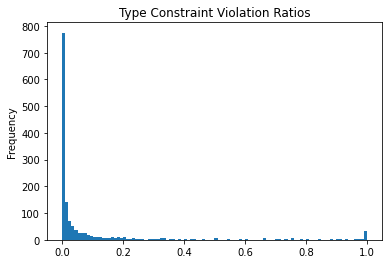

In [44]:
typeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Type Constraint Violation Ratios (<=0.05)')

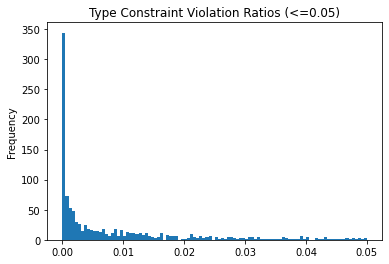

In [45]:
typeConstDF[typeConstDF['violation_ratio'] <= 0.05].violation_ratio.plot.hist(bins=100).set_title("Type Constraint Violation Ratios (<=0.05)")

In [46]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(typeConstDF['violation_ratio'] >= 5.286054)}/{len(typeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/1456


In [47]:
# typeConstDF.sort_values(by=['incorrect'],ascending=False).head(5).paths.values

In [48]:
# !cat ../../allConstraintsAnalysis/typeConstraint/normal/claims.type-constraints.instanceOf.P953.incorrect.tsv

In [49]:
for key1 in typeConstViolations.keys():
    typeConstViolations[key1]['correct'] = typeConstViolations[key1]['instanceOf']['correct'] + typeConstViolations[key1]['subclass']['correct'] + typeConstViolations[key1]['instanceOfOrSubclass']['correct']
    typeConstViolations[key1]['incorrect'] = typeConstViolations[key1]['instanceOf']['incorrect'] + typeConstViolations[key1]['subclass']['incorrect'] + typeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    typeConstViolations[key1]['VR'] = typeConstViolations[key1]['incorrect'] / (typeConstViolations[key1]['correct'] + typeConstViolations[key1]['incorrect'])
        

In [50]:
typeConstViolations

{'mandatory': {'instanceOf': {'correct': 44768778, 'incorrect': 35027},
  'subclass': {'correct': 1966, 'incorrect': 30},
  'instanceOfOrSubclass': {'correct': 221394, 'incorrect': 204},
  'propCount': 165,
  'correct': 44992138,
  'incorrect': 35261,
  'VR': 0.0007831009736982587},
 'suggestion': {'instanceOf': {'correct': 61486, 'incorrect': 18368},
  'subclass': {'correct': 0, 'incorrect': 0},
  'instanceOfOrSubclass': {'correct': 23314, 'incorrect': 2939},
  'propCount': 11,
  'correct': 84800,
  'incorrect': 21307,
  'VR': 0.200806732826298},
 'normal': {'instanceOf': {'correct': 398100301, 'incorrect': 797888},
  'subclass': {'correct': 96605, 'incorrect': 9442},
  'instanceOfOrSubclass': {'correct': 66358710, 'incorrect': 265583},
  'propCount': 1280,
  'correct': 464555616,
  'incorrect': 1072913,
  'VR': 0.0023042252207016293}}

In [51]:
typeConstDF['total'] = typeConstDF['correct'] + typeConstDF['incorrect']
typeConstDF.sort_values(by=['total'],ascending=False).head()

,correct,incorrect,paths,violation_ratio,total
P2093,134805157,6527,[../../allConstraintsAnalysis/typeConstraint_F...,0.000048,134811684
P1476,39856876,47204,[../../allConstraintsAnalysis/typeConstraint_F...,0.001183,39904080
P577,38855314,33977,[../../allConstraintsAnalysis/typeConstraint_F...,0.000874,38889291
P1433,36723283,12050,[../../allConstraintsAnalysis/typeConstraint_F...,0.000328,36735333
P1215,33099195,24104,[../../allConstraintsAnalysis/typeConstraint_F...,0.000728,33123299


In [52]:
typeConstDF.to_csv('../../allConstraintsAnalysis/typeConstDFAnalysis.csv')

### Find out time required

In [18]:
# from tqdm.notebook import tqdm
# import os.path

# cnt = 0
# fCnt = 1
# for prop in tqdm(df1.node1.unique()):
#     try:
#         if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
#             continue
#         relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
#         type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values

#         parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
#         exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values

# #         print(prop, relation, type1, parents, exceptions)

#         if relation == "Q21503252":
#             parentFile = "P31P279star"
#             parentTitle = 'instanceOf'
#         elif relation == "Q21514624":
#             parentFile = "P279star"
#             parentTitle = 'subclass'
#         else:
#             parentFile = "isastar"
#             parentTitle = 'instanceOfOrSubclass'

#         if len(type1) != 0 and type1[0][0] == "Q21502408":
#             typeVal = "mandatory"
#         elif len(type1) != 0 and type1[0][0] == "Q62026391":
#             typeVal = "suggestion"
#         else:
#             typeVal = "normal"

#         if len(exceptions):
#             exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
#         else:
#             exceptionPart = ""
        
#         if cnt % 100 == 0:
#             fOP = open("../../propertiesSplit/checkViolations/TimedTypeConstraintValidator" + str(fCnt) + ".sh","w")
#             fCnt += 1
        
#         fOP.write("{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
#         ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
#         --match 'm: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)' \
#         --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
#         --return 'nodeProp.id, node1, nodeProp.label, node2' \
#         -o ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --graph-cache ~/sqlite3_caches/const2123_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/TimedTypeConstraint_TimedTypeConstraintValidator" + str(fCnt) + ".txt ; \
#          kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
#         --filter-on ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
#         --filter-mode NONE \
#         --input-keys node1 label \
#         --filter-keys node1 label \
#         -o ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

#         cnt += 1
#     except:
#         print("Something failed for prop:",prop)
    

In [93]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("typeConstraintValidator"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [94]:
print(pd.Series(times).describe())

count    1456.000000
mean      138.470137
std       216.121977
min         2.111000
25%        23.664500
50%        43.875000
75%       158.037250
max      2177.421000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for type constraint checks')

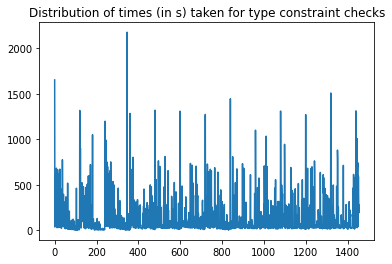

In [95]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for type constraint checks")

## Value Type Constraint

### Understand Constraints File

In [36]:
import pandas as pd
dfValueType = pd.read_csv('../../constraintsOP/valuetypeConstraint/claims.type-constraints_all1.tsv',sep='\t')

In [37]:
dfValueType = dfValueType.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [38]:
dfValueType.head()

,node1,label,node2
0,P1000,P2308,[Q1241356]
1,P1000,P2309,[Q30208840]
2,P1001,P2308,"[Q20926517, Q2881272, Q2882257, Q3624078, Q389..."
3,P1001,P2309,[Q30208840]
4,P1002,P2308,[Q2576663]


In [39]:
dfValueType['label'].unique()

array(['P2308', 'P2309', 'P2303', 'P2316', 'P6607', 'P2304'], dtype=object)

In [40]:
dfValueType[dfValueType['label'] == '2316']

,node1,label,node2


In [41]:
dfValueType[dfValueType['node1'] == 'P1659']

,node1,label,node2
330,P1659,P2308,[Q18616576]
331,P1659,P2309,[Q21503252]
332,P1659,P2316,[Q21502408]


In [42]:
dfValueType[dfValueType.node1 == 'P991']

,node1,label,node2
2031,P991,P2308,"[Q5, Q7210356]"
2032,P991,P2309,[Q21503252]


### Query Generator

In [43]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
for prop in tqdm(dfValueType.node1.unique()):
    try:
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2309')].node2.values[0][0]
        type1 = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2316')].node2.values
#         print(type1)

        parents = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2308')].node2.values[0]
        exceptions = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node2 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'valuetypeConstraint_Final4'
        shellFileSuffix = 'valueTypeConstraintValidator_xverify3'
        
        if cnt % 120 == 0:
            if fOP:
                fOP.close()
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time (kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node2)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const111_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n")
        
        cnt += 1
    except:
        print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/932 [00:00<?, ?it/s]

Something failed for prop: P1389


In [3]:
!zgrep -P "Q98970042\t" ../../wikidata-20210215/derived.P279star.tsv.gz

In [44]:
cnt

897

In [45]:
# import os
# for i in range(1,9):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/valueTypeConstraintValidator_xverify3"+str(i)+".sh")
    

### Analyze Violations

In [21]:
import pandas as pd
import os
from tqdm.notebook import tqdm

valueTypeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

valueTypePropList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    valueTypeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}, 'propCount':0}
    filePath = "../../allConstraintsAnalysis/valuetypeConstraint_Final4/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        valueTypePropList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        valueTypeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        if correctness == 'correct':
            valueTypeConstViolations[folder]['propCount'] += 1
        

0it [00:00, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1572 [00:00<?, ?it/s]

In [22]:
# countLines("../../allConstraintsAnalysis/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [23]:
recordCount = 0
for elem in valueTypeConstViolations.keys():
    for key1 in valueTypeConstViolations[elem].keys():
        try:
            recordCount += valueTypeConstViolations[elem][key1]['correct'] + valueTypeConstViolations[elem][key1]['incorrect']
        except:
            continue
print(f"{len(valueTypePropList)} properties processed for value type constraint for {recordCount} statements")

897 properties processed for value type constraint for 181823950 statements


In [24]:
import pandas as pd
valTypeConstDF = pd.DataFrame(violations).T

In [25]:
valTypeConstDF['violation_ratio'] = valTypeConstDF.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)

In [26]:
valTypeConstDF.head()

,correct,incorrect,paths,violation_ratio
P2302,42211,0,[../../allConstraintsAnalysis/valuetypeConstra...,0.000000
P3092,4620,1,[../../allConstraintsAnalysis/valuetypeConstra...,0.000216
P3096,11150,2,[../../allConstraintsAnalysis/valuetypeConstra...,0.000179
P3156,348,0,[../../allConstraintsAnalysis/valuetypeConstra...,0.000000
P87,4766,3,[../../allConstraintsAnalysis/valuetypeConstra...,0.000629


In [27]:
valTypeConstDF.sort_values(by=['violation_ratio','incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5008,0,331026,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P6104,0,9764,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P2545,0,1369,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P2668,0,168,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P7374,0,32,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P2839,0,14,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P3028,0,13,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P3027,0,12,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P2127,0,11,[../../allConstraintsAnalysis/valuetypeConstra...,1.0
P538,0,10,[../../allConstraintsAnalysis/valuetypeConstra...,1.0


In [ ]:
!cat ../../allConstraintsAnalysis/valuetypeConstraint_Final4/normal/claims.type-constraints.instanceOf.P5008.incorrect.tsv

In [28]:
valTypeConstDF['violation_ratio'].describe()

count    897.000000
mean       0.083622
std        0.205759
min        0.000000
25%        0.000451
50%        0.006186
75%        0.042042
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios')

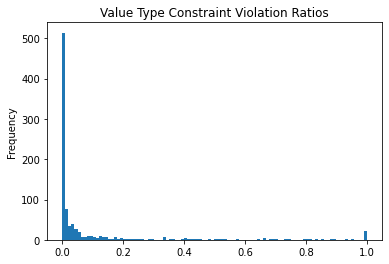

In [29]:
valTypeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios (<=0.04)')

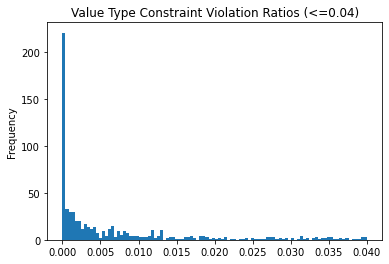

In [30]:
valTypeConstDF[valTypeConstDF['violation_ratio'] <= 0.04].violation_ratio.plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios (<=0.04)")

In [31]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(valTypeConstDF['violation_ratio'] >= 3.950680)}/{len(valTypeConstDF)}")

No. of constraints whose violation ratio is greater than mean :0/897


In [32]:
# valTypeConstDF.sort_values(by=['violation_ratio'],ascending=False).head().paths.values

In [33]:
# !head ../../allConstraintsAnalysis/typeConstraint/normal/claims.type-constraints.instanceOf.P7535.incorrect.tsv

In [34]:
for key1 in valueTypeConstViolations.keys():
    valueTypeConstViolations[key1]['correct'] = valueTypeConstViolations[key1]['instanceOf']['correct'] + valueTypeConstViolations[key1]['subclass']['correct'] + valueTypeConstViolations[key1]['instanceOfOrSubclass']['correct']
    valueTypeConstViolations[key1]['incorrect'] = valueTypeConstViolations[key1]['instanceOf']['incorrect'] + valueTypeConstViolations[key1]['subclass']['incorrect'] + valueTypeConstViolations[key1]['instanceOfOrSubclass']['incorrect']
    valueTypeConstViolations[key1]['VR'] = valueTypeConstViolations[key1]['incorrect'] / (valueTypeConstViolations[key1]['correct'] + valueTypeConstViolations[key1]['incorrect'])
        

In [35]:
valueTypeConstViolations

{'mandatory': {'instanceOf': {'correct': 11391695, 'incorrect': 3339},
  'subclass': {'correct': 44764, 'incorrect': 1},
  'instanceOfOrSubclass': {'correct': 11638, 'incorrect': 35},
  'propCount': 106,
  'correct': 11448097,
  'incorrect': 3375,
  'VR': 0.00029472193618427394},
 'suggestion': {'instanceOf': {'correct': 46036, 'incorrect': 474},
  'subclass': {'correct': 118, 'incorrect': 18},
  'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0},
  'propCount': 5,
  'correct': 46154,
  'incorrect': 492,
  'VR': 0.01054752819105604},
 'normal': {'instanceOf': {'correct': 88858176, 'incorrect': 689971},
  'subclass': {'correct': 4373665, 'incorrect': 6190},
  'instanceOfOrSubclass': {'correct': 76234047, 'incorrect': 163783},
  'propCount': 786,
  'correct': 169465888,
  'incorrect': 859944,
  'VR': 0.00504881725750208}}

In [36]:
valTypeConstDF.to_csv('../../allConstraintsAnalysis/valueTypeConstDFAnalysis.csv')

### Find out time required

In [35]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("valueTypeConstraintValidator_xverify3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/313 [00:00<?, ?it/s]

In [79]:
print(pd.Series(times).describe())

count     897.000000
mean       41.756467
std       133.639231
min         1.516000
25%         3.236000
50%         6.851000
75%        24.280000
max      1683.328000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for value type constraint checks')

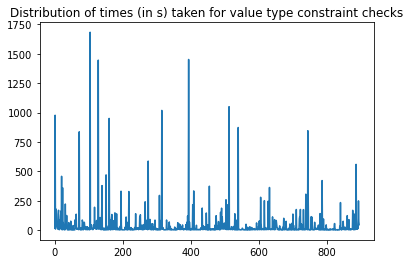

In [80]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for value type constraint checks")

## Item Requires Statement Constraint

### Understand Constraints File

In [37]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/itemRequiresConstraint/claims.type-constraints_all.tsv',sep='\t')

In [38]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [39]:
dfItemRequires['label'].unique()

array(['P2306', 'P2305', 'P2316', 'P2304', 'P2303', 'P6607', 'P4155',
       'P31', 'P2916', 'P4680', 'P2308'], dtype=object)

In [40]:
dfItemRequires['label'].value_counts()

P2306    7182
P2305    2540
P2316    2523
P2303     422
P2304      14
P6607      14
P2916       5
P4680       2
P2308       1
P4155       1
P31         1
Name: label, dtype: int64

In [41]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [42]:
dfItemRequires.head()

label                                  P2303 P2304   P2305   P2306 P2308  \
node1 id                                                                   
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN   NaN     NaN  [P214]   NaN   
P1010 P1010-P2302-Q21503247-56183614-0   NaN   NaN     NaN   [P31]   NaN   
      P1010-P2302-Q21503247-fd256eaf-0   NaN   NaN  [Q794]   [P17]   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN   NaN     NaN   [P31]   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN   NaN     NaN  [P214]   NaN   

label                                         P2316 P2916  P31 P4155 P4680  \
node1 id                                                                     
P1006 P1006-P2302-Q21503247-0451ef47-0          NaN   NaN  NaN   NaN   NaN   
P1010 P1010-P2302-Q21503247-56183614-0          NaN   NaN  NaN   NaN   NaN   
      P1010-P2302-Q21503247-fd256eaf-0  [Q21502408]   NaN  NaN   NaN   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0          NaN   NaN  NaN   NaN   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0          NaN   NaN  NaN   NaN   NaN   

label                                  P6607  
node1 id                                      
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN  
P1010 P1010-P2302-Q21503247-56183614-0   NaN  
      P1010-P2302-Q21503247-fd256eaf-0   NaN  
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN  
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN

In [43]:
dfItemRequires = dfItemRequires.droplevel(1)

In [44]:
dfItemRequires.head()

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P1006,NaN,NaN,NaN,[P214],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1010,NaN,NaN,NaN,[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1010,NaN,NaN,[Q794],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1015,NaN,NaN,NaN,[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1017,NaN,NaN,NaN,[P214],NaN,NaN,NaN,NaN,NaN,NaN,NaN


However, there is one anomaly where the property does not have a co-dependency constraint associated with it, but still has a link to this constraint.

In [45]:
dfItemRequires[dfItemRequires['P4680'].apply(lambda p: type(p) == list)]

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P5447,NaN,NaN,[Q55426051],[P5446],NaN,NaN,NaN,NaN,NaN,[Q46466783],NaN
P5448,NaN,NaN,[Q55426051],[P5446],NaN,NaN,NaN,NaN,NaN,[Q46466783],NaN


In [46]:
dfItemRequires[dfItemRequires['P2305'].apply(lambda p: type(p) == list)]

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P1010,NaN,NaN,[Q794],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,"[Q20808382, Q28218485, Q3044918]",[P39],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,[Q82955],[P106],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,[Q5],[P31],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,"[Q142, Q71084]",[P27],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
P980,NaN,NaN,[Q34],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P981,NaN,NaN,[Q55],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P981,NaN,NaN,[Q1852859],[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Query Generator

#### Version 1 - Mandatory + Suggestion + Normal

In [86]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand_Sugg_Normal"
shellFileSuffix = 'codepConst_MSN_Validator_new2_'
graph_cache_file_prefix = "codep_new3_001_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + suggestion + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P3350.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P5128.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.ts

In [11]:
cnt

NameError: name 'cnt' is not defined

In [88]:
fCnt

27

In [123]:
# from tqdm.notebook import tqdm
# import os.path
# import os
# folderName = 'codependencyConstraint'
# for prop in tqdm(dfItemRequires.index.unique()):
#     for subFolderName in ['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal']:
#         if os.path.isfile("../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv") and \
#             os.path.isfile("../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv"):
#                 os.system("kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
#                     ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
#                     -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_w_exceptions.tsv")

In [16]:
# import os
# for i in range(1,28):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_MSN_Validator_new2_"+str(i)+".sh")

#### Version 2 - Mandatory + Normal

In [89]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand_Normal"
shellFileSuffix = 'codepConst_MN_Validator_new2_'
graph_cache_file_prefix = "codep_new3_02_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.tsv does not exist
File: ../../propertiesSplit/claims.P715.tsv does not exist
File: ../../propertiesSplit/claims.P2606.tsv does not exist
File: ../../propertiesSplit/claims.P8303.tsv

In [14]:
cnt

468

In [18]:
# import os
# for i in range(1,25):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_MN_Validator_new2_"+str(i)+".sh")

#### Version 3 - Mandatory

In [90]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand"
shellFileSuffix = 'codepConst_M_Validator_new2_'
graph_cache_file_prefix = "codep_new3_03_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P1627.tsv does not exist


In [91]:
cnt

78

In [17]:
# import os
# for i in range(1,5):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_M_Validator_new2_"+str(i)+".sh")

#### Version 4 - Normal

In [92]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Normal"
shellFileSuffix = 'codepConst_N_Validator_new2_'
graph_cache_file_prefix = "codep_new3_04_"

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.tsv does not exist
File: ../../propertiesSplit/claims.P715.tsv does not exist
File: ../../propertiesSplit/claims.P2606.tsv does not exist
File: ../../propertiesSplit/claims.P8303.tsv does not exist
File: ../../propertiesSplit/claims.P1874.tsv

In [93]:
cnt

418

In [19]:
# import os
# for i in range(1,23):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_N_Validator_new2_"+str(i)+".sh")

#### Version 5 - Suggestion

In [16]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Suggestion"
shellFileSuffix = 'codepConst_S_Validator_new_3_'
graph_cache_file_prefix = "codep_new4_05_"

fOP = None

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = suggestion
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt;\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P3350.tsv does not exist
File: ../../propertiesSplit/claims.P5128.tsv does not exist


In [17]:
cnt

97

In [18]:
import os
for i in range(1,6):
    os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_S_Validator_new_3_"+str(i)+".sh")

### Merge all correct/incorrect outputs

In [17]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [15]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint_Final/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [ ]:
# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint/" + folder + "/"
#     folderPathNew = "../../allConstraintsAnalysis/codependencyConstraint_Final/" + folder + "/"
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.correctSuperSet.tsv --filter-on {folderPath}claims.all.correctSuperSet.tsv -o {folderPathNew}claims.all.correctSuperSet.diff.tsv")
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.incorrectSuperSet.tsv --filter-on {folderPath}claims.all.incorrectSuperSet.tsv -o {folderPathNew}claims.all.incorrectSuperSet.diff.tsv")
    

### Analyze Violations

In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

codepConstViolations = {}
codepConstPropList = set()

# codepConstViolationsSummary = {}

for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal','Suggestion'])):
    filePath = "../../allConstraintsAnalysis/codependencyConstraint_Final/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        codepConstPropList.add(prop)
        count1 = countLines(filePath+filename)
        if folder not in codepConstViolations:
            codepConstViolations[folder] = {}
        if prop not in codepConstViolations[folder]:
            codepConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        codepConstViolations[folder][prop][correctness] = count1
        codepConstViolations[folder][prop]['paths'].append(filePath+filename)
        
#         if folder not in codepConstViolationsSummary:
#             codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
#         codepConstViolationsSummary[folder][correctness] += count1

0it [00:00, ?it/s]

  0%|          | 0/1192 [00:00<?, ?it/s]

  0%|          | 0/1053 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/953 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

In [2]:
codepConstViolationsSummary = {}
for folder in codepConstViolations.keys():
    for prop in codepConstViolations[folder].keys():
        if folder not in codepConstViolationsSummary:
            codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0, 'propCount': 0}
        codepConstViolationsSummary[folder]['correct'] += codepConstViolations[folder][prop]['correct']
        codepConstViolationsSummary[folder]['incorrect'] += codepConstViolations[folder][prop]['incorrect']
        codepConstViolationsSummary[folder]['propCount'] += 1

In [3]:
for elem in codepConstViolationsSummary.keys():
    codepConstViolationsSummary[elem]['total'] = codepConstViolationsSummary[elem]['correct'] + codepConstViolationsSummary[elem]['incorrect']
    codepConstViolationsSummary[elem]['percIncorrect'] = codepConstViolationsSummary[elem]['incorrect'] / codepConstViolationsSummary[elem]['total'] * 100

In [4]:
codepConstViolationsSummary

{'Mand_Sugg_Normal': {'correct': 298173993,
  'incorrect': 4433743,
  'propCount': 527,
  'total': 302607736,
  'percIncorrect': 1.4651783389965947},
 'Mand_Normal': {'correct': 273602683,
  'incorrect': 2229992,
  'propCount': 468,
  'total': 275832675,
  'percIncorrect': 0.8084582437523038},
 'Mand': {'correct': 3984740,
  'incorrect': 717,
  'propCount': 78,
  'total': 3985457,
  'percIncorrect': 0.01799040862816987},
 'Normal': {'correct': 272710532,
  'incorrect': 2229328,
  'propCount': 418,
  'total': 274939860,
  'percIncorrect': 0.8108420510580022},
 'Suggestion': {'correct': 25729758,
  'incorrect': 2224050,
  'propCount': 97,
  'total': 27953808,
  'percIncorrect': 7.95616110692325}}

In [ ]:
mandatoryPropCount = 0
suggestionPropCount = 0
normalPropCount = 0
for prop in tqdm(dfItemRequires.index.unique()):
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    prop = str(prop)
    hasMandatory = False
    hasSuggestion = False
    hasNormal = False

    for _, constraint in dfItemRequires.loc[[prop]].iterrows():
        prop2 = constraint['P2306']
            
        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
            continue
            
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                hasMandatory = True
            elif constraint['P2316'][0] == 'Q62026391':
                hasSuggestion = True
        else:
            hasNormal = True
    if hasMandatory:
        mandatoryPropCount += 1
    if hasSuggestion:
        suggestionPropCount += 1
    if hasNormal:
        normalPropCount += 1

In [ ]:
print(f"No. of props having at least 1 mandatory constraint: {mandatoryPropCount}")
print(f"No. of props having at least 1 suggestion constraint: {suggestionPropCount}")
print(f"No. of props having at least 1 normal constraint: {normalPropCount}")

#### Version 1 - Mand Sugg Normal

In [5]:
import pandas as pd
codepConstDF1 = pd.DataFrame(codepConstViolations['Mand_Sugg_Normal']).T

In [6]:
codepConstDF1

,correct,incorrect,paths
P1018,156,28,[../../allConstraintsAnalysis/codependencyCons...
P119,176018,2477,[../../allConstraintsAnalysis/codependencyCons...
P1629,7531,88,[../../allConstraintsAnalysis/codependencyCons...
P1464,35000,831,[../../allConstraintsAnalysis/codependencyCons...
P1345,113,48,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P19,2637114,24855,[../../allConstraintsAnalysis/codependencyCons...
P2873,642,8,[../../allConstraintsAnalysis/codependencyCons...
P2875,3547,16,[../../allConstraintsAnalysis/codependencyCons...
P2876,51,14,[../../allConstraintsAnalysis/codependencyCons...


In [7]:
codepConstDF1['violation_ratio'] = codepConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [8]:
codepConstDF1.sort_values(by=['violation_ratio', 'incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2302,0,42211,[../../allConstraintsAnalysis/codependencyCons...,1.0
P3063,0,549,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2303,0,39,[../../allConstraintsAnalysis/codependencyCons...,1.0
P5447,0,23,[../../allConstraintsAnalysis/codependencyCons...,1.0
P5448,0,23,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2308,0,17,[../../allConstraintsAnalysis/codependencyCons...,1.0
P7569,0,8,[../../allConstraintsAnalysis/codependencyCons...,1.0
P7903,0,7,[../../allConstraintsAnalysis/codependencyCons...,1.0
P574,0,4,[../../allConstraintsAnalysis/codependencyCons...,1.0


In [9]:
list(codepConstDF1.loc['P2302']['paths'])

['../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.correct.tsv',
 '../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv']

In [10]:
!head ../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
P10-P2302-Q21502404-d012aef4-0	P10	P2302	Q21502404	normal	wikibase-item
P10-P2302-Q21510851-5224fe0b-0	P10	P2302	Q21510851	normal	wikibase-item
P10-P2302-Q21510852-dde2f0ce-0	P10	P2302	Q21510852	normal	wikibase-item
P10-P2302-Q52004125-d0288d06-0	P10	P2302	Q52004125	normal	wikibase-item
P10-P2302-Q53869507-974ce3b1-0	P10	P2302	Q53869507	normal	wikibase-item
P1000-P2302-Q21510856-b2772a67-0	P1000	P2302	Q21510856	normal	wikibase-item
P1000-P2302-Q21510865-1f5093e9-0	P1000	P2302	Q21510865	normal	wikibase-item
P1000-P2302-Q53869507-36dbee67-0	P1000	P2302	Q53869507	normal	wikibase-item
P1001-P2302-Q21502838-3cc7ade2-0	P1001	P2302	Q21502838	normal	wikibase-item


In [11]:
codepConstDF1.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2214,2962988,711699,[../../allConstraintsAnalysis/codependencyCons...,0.193676
P734,2001246,704728,[../../allConstraintsAnalysis/codependencyCons...,0.260434
P433,31028893,435483,[../../allConstraintsAnalysis/codependencyCons...,0.013841
P195,1132062,384602,[../../allConstraintsAnalysis/codependencyCons...,0.253584
P569,4646728,241105,[../../allConstraintsAnalysis/codependencyCons...,0.049328
P131,10056935,198870,[../../allConstraintsAnalysis/codependencyCons...,0.019391
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,0.954027
P2860,174402886,114713,[../../allConstraintsAnalysis/codependencyCons...,0.000657
P570,2332611,94455,[../../allConstraintsAnalysis/codependencyCons...,0.038917
P2017,84792,90131,[../../allConstraintsAnalysis/codependencyCons...,0.515261


In [12]:
codepConstDF1['violation_ratio'].describe()

count    527.000000
mean       0.206083
std        0.305674
min        0.000000
25%        0.000929
50%        0.032847
75%        0.298101
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 1 - Violation Ratios')

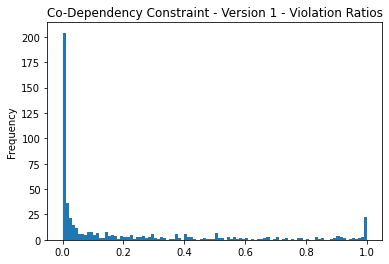

In [13]:
codepConstDF1['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5')

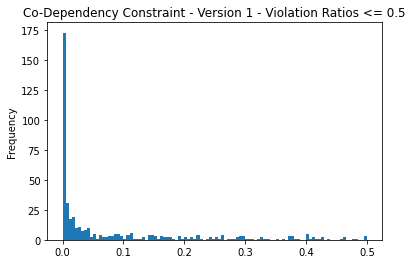

In [14]:
codepConstDF1[codepConstDF1['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5")

In [15]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF1['violation_ratio'] >= 3.539484)}/{len(codepConstDF1)}")

No. of properties whose violation ratio is greater than mean: 0/527


In [16]:
codepConstDF1.to_csv('../../allConstraintsAnalysis/codepConstDFAnalysis.csv')

#### Version 2 - Mand Normal

In [179]:
import pandas as pd
codepConstDF2 = pd.DataFrame(codepConstViolations['Mand_Normal']).T

In [180]:
codepConstDF2

,correct,incorrect,paths
P1196,85037,3039,[../../allConstraintsAnalysis/codependencyCons...
P1383,31726,41,[../../allConstraintsAnalysis/codependencyCons...
P1018,156,28,[../../allConstraintsAnalysis/codependencyCons...
P1538,194334,152,[../../allConstraintsAnalysis/codependencyCons...
P1685,4321,0,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P2962,26803,2,[../../allConstraintsAnalysis/codependencyCons...
P183,19026,140,[../../allConstraintsAnalysis/codependencyCons...
P1999,2403,0,[../../allConstraintsAnalysis/codependencyCons...
P2009,1019,15,[../../allConstraintsAnalysis/codependencyCons...


In [181]:
codepConstDF2['violation_ratio'] = codepConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)

In [182]:
codepConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2307,0,1,[../../allConstraintsAnalysis/codependencyCons...,1.0
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,1.0
P7569,0,8,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2916,0,1,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2309,0,1,[../../allConstraintsAnalysis/codependencyCons...,1.0
P7903,0,7,[../../allConstraintsAnalysis/codependencyCons...,1.0
P5447,0,23,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2311,0,1,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2433,0,1,[../../allConstraintsAnalysis/codependencyCons...,1.0
P2313,0,1,[../../allConstraintsAnalysis/codependencyCons...,1.0


In [183]:
codepConstDF2.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2214,2962988,711699,[../../allConstraintsAnalysis/codependencyCons...,0.193676
P433,31028893,435483,[../../allConstraintsAnalysis/codependencyCons...,0.013841
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,0.954027
P2860,174402886,114713,[../../allConstraintsAnalysis/codependencyCons...,0.000657
P1435,1893874,79479,[../../allConstraintsAnalysis/codependencyCons...,0.040276
P708,45253,54258,[../../allConstraintsAnalysis/codependencyCons...,0.545246
P197,117522,49904,[../../allConstraintsAnalysis/codependencyCons...,0.298066
P1598,36978,46481,[../../allConstraintsAnalysis/codependencyCons...,0.556932
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,1.000000
P2248,4020,41566,[../../allConstraintsAnalysis/codependencyCons...,0.911815


In [184]:
codepConstDF2['violation_ratio'].describe()

count    468.000000
mean       0.169189
std        0.285155
min        0.000000
25%        0.000663
50%        0.016656
75%        0.193986
max        1.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 2 - Violation Ratios')

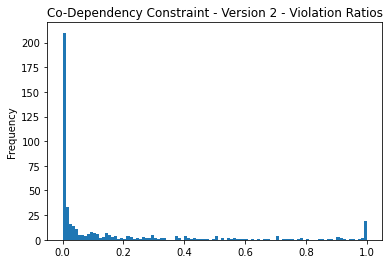

In [185]:
codepConstDF2['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5')

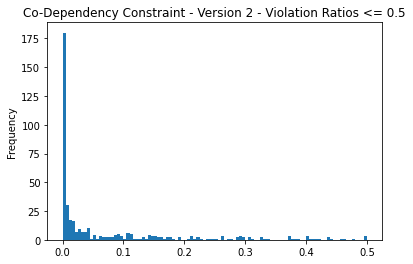

In [186]:
codepConstDF2[codepConstDF2['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5")

In [187]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF2['violation_ratio'] >= 2.290915)}/{len(codepConstDF2)}")

No. of properties whose violation ratio is greater than mean: 0/468


#### Version 3 - Mand

In [188]:
import pandas as pd
codepConstDF3 = pd.DataFrame(codepConstViolations['Mand']).T

In [189]:
codepConstDF3

,correct,incorrect,paths
P1081,12300,0,[../../allConstraintsAnalysis/codependencyCons...
P2021,2303,1,[../../allConstraintsAnalysis/codependencyCons...
P3744,311,0,[../../allConstraintsAnalysis/codependencyCons...
P5982,1326,0,[../../allConstraintsAnalysis/codependencyCons...
P3815,580,0,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P1879,1695,0,[../../allConstraintsAnalysis/codependencyCons...
P3648,7,0,[../../allConstraintsAnalysis/codependencyCons...
P197,167392,34,[../../allConstraintsAnalysis/codependencyCons...
P1990,7619,1,[../../allConstraintsAnalysis/codependencyCons...


In [190]:
codepConstDF3['violation_ratio'] = codepConstDF3.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [191]:
codepConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5051,1,63,[../../allConstraintsAnalysis/codependencyCons...,63.000000
P4341,7,1,[../../allConstraintsAnalysis/codependencyCons...,0.142857
P2095,38,3,[../../allConstraintsAnalysis/codependencyCons...,0.078947
P3931,2250,64,[../../allConstraintsAnalysis/codependencyCons...,0.028444
P1731,363,9,[../../allConstraintsAnalysis/codependencyCons...,0.024793
P2009,1019,15,[../../allConstraintsAnalysis/codependencyCons...,0.014720
P246,169,2,[../../allConstraintsAnalysis/codependencyCons...,0.011834
P8264,0,1,[../../allConstraintsAnalysis/codependencyCons...,0.010000
P944,577,4,[../../allConstraintsAnalysis/codependencyCons...,0.006932
P1560,3235,20,[../../allConstraintsAnalysis/codependencyCons...,0.006182


In [192]:
codepConstDF3.loc['P1713']

correct                                                         1980
incorrect                                                          1
paths              [../../allConstraintsAnalysis/codependencyCons...
violation_ratio                                             0.000505
Name: P1713, dtype: object

In [193]:
!head ../../allConstraintsAnalysis/codependencyConstraint_Final/Mand/claims.P1713.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q4681882-P1713-d878eb-9fff460e-0	Q4681882	P1713	"https://heightnetworth.com/adele-givens-net-worth-2020/"	normal	url


In [77]:
!cat ../../allConstraintsAnalysis/codependencyConstraint/Mand/claims.P1713.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q1000195-P1713-e792ce-9b50511b-0	Q1000195	P1713	"http://webarchiv.bundestag.de/archive/2007/0206/mdb/mdb13/bio/T/thiesdi0.html"	normal	url
Q100218-P1713-3e741f-4bb9633d-0	Q100218	P1713	"http://webarchiv.bundestag.de/archive/2013/1212/bundestag/abgeordnete17/biografien/B/bunge_martina.html"	normal	url
Q100250-P1713-33d6e4-326e7a64-0	Q100250	P1713	"http://webarchiv.bundestag.de/archive/2010/0427/bundestag/abgeordnete/bio/B/bauerwo0.html"	normal	url
Q100357-P1713-f75a30-72e42938-0	Q100357	P1713	"http://webarchiv.bundestag.de/archive/2007/0206/mdb/mdb14/bio/J/juengsa0.html"	normal	url
Q100615-P1713-cd17a0-c89f234d-0	Q100615	P1713	"http://webarchiv.bundestag.de/archive/2013/1212/bundestag/abgeordnete17/biografien/P/ploetz_yvonne.html"	normal	url
Q100617-P1713-2396a5-62789180-0	Q100617	P1713	"http://webarchiv.bundestag.de/archive/2013/1212/bundestag/abgeordnete17/biografien/S/schwanitz_rolf.html"	normal	url
Q100717883-P1713-bd827f-36a0ade3-0	Q1007

In [78]:
codepConstDF3.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P7959,655743,376,[../../allConstraintsAnalysis/codependencyCons...,0.000573
P3931,2250,64,[../../allConstraintsAnalysis/codependencyCons...,0.028444
P5051,1,63,[../../allConstraintsAnalysis/codependencyCons...,63.000000
P915,28364,45,[../../allConstraintsAnalysis/codependencyCons...,0.001587
P451,10502,36,[../../allConstraintsAnalysis/codependencyCons...,0.003428
P197,167392,34,[../../allConstraintsAnalysis/codependencyCons...,0.000203
P1560,3235,20,[../../allConstraintsAnalysis/codependencyCons...,0.006182
P2009,1019,15,[../../allConstraintsAnalysis/codependencyCons...,0.014720
P1731,363,9,[../../allConstraintsAnalysis/codependencyCons...,0.024793
P1196,88070,6,[../../allConstraintsAnalysis/codependencyCons...,0.000068


In [79]:
codepConstDF3['violation_ratio'].describe()

count    78.000000
mean      0.812130
std       7.132861
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000558
max      63.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 3 - Violation Ratios')

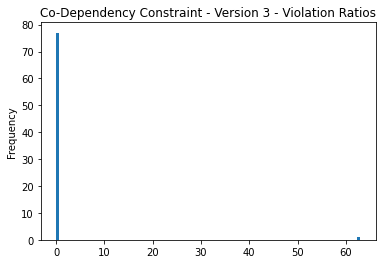

In [80]:
codepConstDF3['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005')

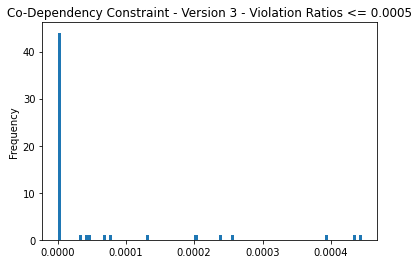

In [81]:
codepConstDF3[codepConstDF3['violation_ratio'] <= 0.0005].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005")

In [82]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF3['violation_ratio'] >= 0.922928)}/{len(codepConstDF3)}")

No. of properties whose violation ratio is greater than mean: 1/78


#### Version 4 - Normal

In [83]:
import pandas as pd
codepConstDF4 = pd.DataFrame(codepConstViolations['Normal']).T

In [84]:
codepConstDF4

,correct,incorrect,paths
P1018,156,28,[../../allConstraintsAnalysis/codependencyCons...
P1540,236379,456,[../../allConstraintsAnalysis/codependencyCons...
P1283,1383,0,[../../allConstraintsAnalysis/codependencyCons...
P1896,4779,322,[../../allConstraintsAnalysis/codependencyCons...
P171,2856794,2307,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P2916,0,1,[../../allConstraintsAnalysis/codependencyCons...
P1873,394,61,[../../allConstraintsAnalysis/codependencyCons...
P2923,2687,2738,[../../allConstraintsAnalysis/codependencyCons...
P1879,1695,0,[../../allConstraintsAnalysis/codependencyCons...


In [85]:
codepConstDF4['violation_ratio'] = codepConstDF4.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [86]:
codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P1995,80,9985,[../../allConstraintsAnalysis/codependencyCons...,124.812500
P768,133,15143,[../../allConstraintsAnalysis/codependencyCons...,113.857143
P4501,419,22682,[../../allConstraintsAnalysis/codependencyCons...,54.133652
P2715,4,158,[../../allConstraintsAnalysis/codependencyCons...,39.500000
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2376,1,19,[../../allConstraintsAnalysis/codependencyCons...,19.000000
P3912,297,3705,[../../allConstraintsAnalysis/codependencyCons...,12.474747
P2720,12,134,[../../allConstraintsAnalysis/codependencyCons...,11.166667
P2248,4020,41566,[../../allConstraintsAnalysis/codependencyCons...,10.339801


In [87]:
# list(codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(5).paths)

In [88]:
codepConstDF4.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2214,2962988,711699,[../../allConstraintsAnalysis/codependencyCons...,0.240196
P433,31028893,435483,[../../allConstraintsAnalysis/codependencyCons...,0.014035
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2860,174402886,114713,[../../allConstraintsAnalysis/codependencyCons...,0.000658
P1435,1893874,79479,[../../allConstraintsAnalysis/codependencyCons...,0.041966
P708,45253,54258,[../../allConstraintsAnalysis/codependencyCons...,1.198992
P197,117523,49903,[../../allConstraintsAnalysis/codependencyCons...,0.424623
P1598,36978,46481,[../../allConstraintsAnalysis/codependencyCons...,1.256991
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P2248,4020,41566,[../../allConstraintsAnalysis/codependencyCons...,10.339801


In [89]:
codepConstDF4['violation_ratio'].describe()

count    418.000000
mean       2.448558
std       24.334208
min        0.000000
25%        0.001391
50%        0.022781
75%        0.220654
max      463.270000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 4 - Violation Ratios')

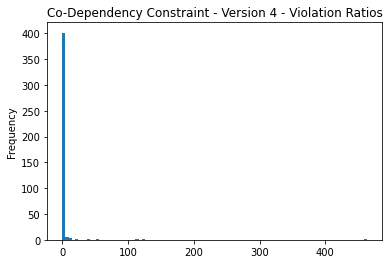

In [90]:
codepConstDF4['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5')

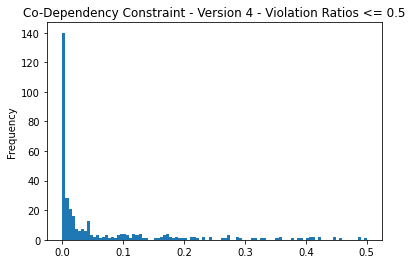

In [91]:
codepConstDF4[codepConstDF4['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5")

In [92]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF4['violation_ratio'] >= 2.414703)}/{len(codepConstDF4)}")

No. of properties whose violation ratio is greater than mean: 25/418


### Find out time required

In [ ]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
timesVersion = {"MSN": [], "MN": [], "M": [], "N": [], "S": []}
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("timeLog_codepConst_"):
        ver = filename.split('_')[2]
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes
        timesVersion[ver] += tempTimes
print(pd.Series(times).describe())

In [ ]:
print(pd.Series(timesVersion['MSN']).describe())

In [ ]:
print(pd.Series(timesVersion['MN']).describe())

In [ ]:
print(pd.Series(timesVersion['M']).describe())

In [ ]:
print(pd.Series(timesVersion['N']).describe())

## Symmetric Constraint (Q21510862)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [1]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510862)" \
    -o ../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-01 11:07:06 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510862']
---------------------------------------------


In [2]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv",sep='\t')

In [3]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [4]:
constDF2.to_csv("../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [5]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv',sep='\t')

In [6]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [7]:
dfItemRequires['label'].unique()

array(['P2316', 'P2303'], dtype=object)

In [8]:
dfItemRequires['label'].value_counts()

P2316    42
P2303     3
Name: label, dtype: int64

In [9]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [10]:
dfItemRequires.head()

,label,P2303,P2316
node1,id,,
P1322,P1322-P2302-Q21510862-85dea891-0,NaN,[Normal]
P1327,P1327-P2302-Q21510862-a3c3a094-0,NaN,[Normal]
P1382,P1382-P2302-Q21510862-f6bcfecf-0,NaN,[Normal]
P1560,P1560-P2302-Q21510862-fabecaeb-0,NaN,[Q21502408]
P1639,P1639-P2302-Q21510862-384edcd4-0,NaN,[Q21502408]


In [11]:
dfItemRequires = dfItemRequires.droplevel(1)

In [12]:
dfItemRequires.head()

label,P2303,P2316
node1,,
P1322,NaN,[Normal]
P1327,NaN,[Normal]
P1382,NaN,[Normal]
P1560,NaN,[Q21502408]
P1639,NaN,[Q21502408]


### Query Generator

In [14]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'symmetricConstraint'
shellFileSuffix = 'symmConst_Validator_'
graph_cache_prefix = 'symm_03'

for row in tqdm(dfItemRequires.iterrows()):
#     try:
        prop = row[0]
        constraint = row[1]
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                sfname = 'mandatory'
            elif constraint['P2316'][0] == 'Q62026391':
                sfname = 'suggestion'
            elif constraint['P2316'][0] == 'Normal':
                sfname = 'normal'
        else:
            sfname = 'normal'
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        command = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
                    ../../propertiesSplit/claims."+ prop +".copy2.tsv \
                    --match 'tsv: (node1)-[nodeProp]->(node2), copy2: (node2)-[]->(node1)' "
        
        os.system("cp ../../propertiesSplit/claims."+ prop +".tsv ../../propertiesSplit/claims."+ prop +".copy2.tsv")
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        command
        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = constraint['P2303']
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = " kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

0it [00:00, ?it/s]

In [15]:
cnt

38

In [16]:
# import os
# for i in range(1,3):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/symmConst_Validator_"+str(i)+".sh")

### Analyze Violations

In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm

symmConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt 

symmConstViolations = {}
symmConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis/symmetricConstraint/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        symmConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in symmConstViolations:
            symmConstViolations[folder] = {}
        if prop not in symmConstViolations[folder]:
            symmConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        symmConstViolations[folder][prop][correctness] = count1
        symmConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
len(symmConstPropList)

38

38

In [4]:
symmConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    symmConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in symmConstViolations[folder].keys():
        symmConstViolationsSummary[folder]['correct'] += symmConstViolations[folder][prop]['correct']
        symmConstViolationsSummary[folder]['incorrect'] += symmConstViolations[folder][prop]['incorrect']
    symmConstViolationsSummary[folder]['total'] = symmConstViolationsSummary[folder]['correct'] + symmConstViolationsSummary[folder]['incorrect']
    symmConstViolationsSummary[folder]['percIncorrect'] = symmConstViolationsSummary[folder]['incorrect'] / symmConstViolationsSummary[folder]['total'] * 100
    symmConstViolationsSummary[folder]['propCount'] = len(symmConstViolations[folder].keys())

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [5]:
symmConstViolationsSummary

{'mandatory': {'correct': 7439,
  'incorrect': 34,
  'total': 7473,
  'percIncorrect': 0.454971229760471,
  'propCount': 5},
 'normal': {'correct': 6241838,
  'incorrect': 47970,
  'total': 6289808,
  'percIncorrect': 0.7626623896945661,
  'propCount': 30},
 'suggestion': {'correct': 782869,
  'incorrect': 31595,
  'total': 814464,
  'percIncorrect': 3.879238370265598,
  'propCount': 3}}

{'mandatory': {'correct': 7439,
  'incorrect': 34,
  'total': 7473,
  'percIncorrect': 0.454971229760471,
  'propCount': 5},
 'normal': {'correct': 6241838,
  'incorrect': 47970,
  'total': 6289808,
  'percIncorrect': 0.7626623896945661,
  'propCount': 30},
 'suggestion': {'correct': 782869,
  'incorrect': 31595,
  'total': 814464,
  'percIncorrect': 3.879238370265598,
  'propCount': 3}}

In [6]:
noOfStmts = 0
for fold in symmConstViolationsSummary.keys():
    noOfStmts += symmConstViolationsSummary[fold]['total']
noOfStmts

7111745

7111745

In [7]:
symmConstDF1 = pd.DataFrame(symmConstViolations['mandatory']).T
symmConstDF1['violation_ratio'] = symmConstDF1.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2152,75,1,[../../allConstraintsAnalysis/symmetricConstra...,0.013158
P1639,2059,20,[../../allConstraintsAnalysis/symmetricConstra...,0.009620
P1560,3239,13,[../../allConstraintsAnalysis/symmetricConstra...,0.003998
P6185,280,0,[../../allConstraintsAnalysis/symmetricConstra...,0.000000
P3364,1786,0,[../../allConstraintsAnalysis/symmetricConstra...,0.000000


,correct,incorrect,paths,violation_ratio
P2152,75,1,[../../allConstraintsAnalysis/symmetricConstra...,0.013158
P1639,2059,20,[../../allConstraintsAnalysis/symmetricConstra...,0.009620
P1560,3239,13,[../../allConstraintsAnalysis/symmetricConstra...,0.003998
P6185,280,0,[../../allConstraintsAnalysis/symmetricConstra...,0.000000
P3364,1786,0,[../../allConstraintsAnalysis/symmetricConstra...,0.000000


In [8]:
symmConstDF2 = pd.DataFrame(symmConstViolations['suggestion']).T
symmConstDF2['violation_ratio'] = symmConstDF2.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2789,103892,6058,[../../allConstraintsAnalysis/symmetricConstra...,0.055098
P1889,505954,23764,[../../allConstraintsAnalysis/symmetricConstra...,0.044862
P197,173023,1773,[../../allConstraintsAnalysis/symmetricConstra...,0.010143


,correct,incorrect,paths,violation_ratio
P2789,103892,6058,[../../allConstraintsAnalysis/symmetricConstra...,0.055098
P1889,505954,23764,[../../allConstraintsAnalysis/symmetricConstra...,0.044862
P197,173023,1773,[../../allConstraintsAnalysis/symmetricConstra...,0.010143


In [9]:
symmConstDF3 = pd.DataFrame(symmConstViolations['normal']).T
symmConstDF3['violation_ratio'] = symmConstDF3.apply(lambda p: p.incorrect / (p.incorrect + p.correct), axis=1)
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5188,0,2,[../../allConstraintsAnalysis/symmetricConstra...,1.000000
P1706,4,49,[../../allConstraintsAnalysis/symmetricConstra...,0.924528
P2652,460,777,[../../allConstraintsAnalysis/symmetricConstra...,0.628133
P521,418,144,[../../allConstraintsAnalysis/symmetricConstra...,0.256228
P2293,9984,1919,[../../allConstraintsAnalysis/symmetricConstra...,0.161220
P3032,1674,320,[../../allConstraintsAnalysis/symmetricConstra...,0.160481
P1382,10807,1587,[../../allConstraintsAnalysis/symmetricConstra...,0.128046
P1327,7754,638,[../../allConstraintsAnalysis/symmetricConstra...,0.076025
P451,9549,749,[../../allConstraintsAnalysis/symmetricConstra...,0.072733
P3403,2130,110,[../../allConstraintsAnalysis/symmetricConstra...,0.049107


,correct,incorrect,paths,violation_ratio
P5188,0,2,[../../allConstraintsAnalysis/symmetricConstra...,1.000000
P1706,4,49,[../../allConstraintsAnalysis/symmetricConstra...,0.924528
P2652,460,777,[../../allConstraintsAnalysis/symmetricConstra...,0.628133
P521,418,144,[../../allConstraintsAnalysis/symmetricConstra...,0.256228
P2293,9984,1919,[../../allConstraintsAnalysis/symmetricConstra...,0.161220
P3032,1674,320,[../../allConstraintsAnalysis/symmetricConstra...,0.160481
P1382,10807,1587,[../../allConstraintsAnalysis/symmetricConstra...,0.128046
P1327,7754,638,[../../allConstraintsAnalysis/symmetricConstra...,0.076025
P451,9549,749,[../../allConstraintsAnalysis/symmetricConstra...,0.072733
P3403,2130,110,[../../allConstraintsAnalysis/symmetricConstra...,0.049107


In [10]:
# !head ../../allConstraintsAnalysis/symmetricConstraint/normal/claims.P3032.incorrect.tsv



Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

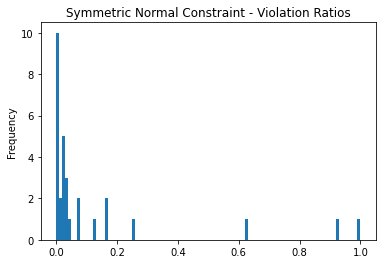

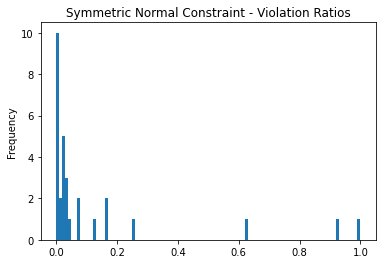

In [11]:
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

In [12]:
pd.concat([symmConstDF1, symmConstDF2, symmConstDF3]).to_csv('../../allConstraintsAnalysis/symmConstDFAnalysis.csv')

### Find out time required

In [11]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("symmConst_Validator_"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/108 [00:00<?, ?it/s]

In [12]:
print(pd.Series(times).describe())

count     38.000000
mean      15.315868
std       61.526228
min        2.069000
25%        2.617750
50%        3.003000
75%        5.889250
max      383.135000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

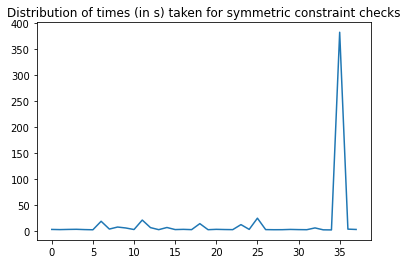

In [13]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

## Inverse Constraint (Q21510855)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [1]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510855)" \
    -o ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-11 11:02:04 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510855']
---------------------------------------------


In [2]:
!head ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv

id	node1	label	node2	rank	node2;wikidatatype
P1026-P2302-Q21510855-adc83b86-0	P1026	P2302	Q21510855	normal	wikibase-item
P1029-P2302-Q21510855-6b55e057-0	P1029	P2302	Q21510855	normal	wikibase-item
P115-P2302-Q21510855-f7aa0b78-0	P115	P2302	Q21510855	normal	wikibase-item
P1151-P2302-Q21510855-0d9aa9c6-0	P1151	P2302	Q21510855	normal	wikibase-item
P1204-P2302-Q21510855-e3d53bb6-0	P1204	P2302	Q21510855	normal	wikibase-item
P1283-P2302-Q21510855-0e7699bb-0	P1283	P2302	Q21510855	normal	wikibase-item
P1308-P2302-Q21510855-2aba96b7-0	P1308	P2302	Q21510855	normal	wikibase-item
P1365-P2302-Q21510855-c809b758-0	P1365	P2302	Q21510855	normal	wikibase-item
P1366-P2302-Q21510855-eee12ef8-0	P1366	P2302	Q21510855	normal	wikibase-item


In [3]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/inverseConstraint/claims.constraints_list.tsv",sep='\t')

In [4]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [5]:
constDF2.to_csv("../../constraintsOP/inverseConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [6]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/inverseConstraint/claims.constraints_all.tsv',sep='\t')

In [7]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [8]:
dfItemRequires['label'].unique()

array(['P2306', 'P2316', 'P4155', 'P2303'], dtype=object)

In [9]:
dfItemRequires['label'].value_counts()

P2306    110
P2316     10
P2303      2
P4155      1
Name: label, dtype: int64

In [10]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [11]:
dfItemRequires.head()

,label,P2303,P2306,P2316,P4155
node1,id,,,,
P1026,P1026-P2302-Q21510855-adc83b86-0,NaN,[P50],NaN,NaN
P1029,P1029-P2302-Q21510855-6b55e057-0,NaN,[P5096],NaN,NaN
P115,P115-P2302-Q21510855-f7aa0b78-0,NaN,[P466],NaN,NaN
P1151,P1151-P2302-Q21510855-0d9aa9c6-0,NaN,[P1204],[Q21502408],NaN
P1204,P1204-P2302-Q21510855-e3d53bb6-0,NaN,[P1151],NaN,NaN


In [12]:
dfItemRequires = dfItemRequires.droplevel(1)

In [13]:
dfItemRequires.head()

label,P2303,P2306,P2316,P4155
node1,,,,
P1026,NaN,[P50],NaN,NaN
P1029,NaN,[P5096],NaN,NaN
P115,NaN,[P466],NaN,NaN
P1151,NaN,[P1204],[Q21502408],NaN
P1204,NaN,[P1151],NaN,NaN


### Query Generator

In [48]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0
fOP = None

folderName = 'inverseConstraint_Final'
shellFileSuffix = 'invConst_Validator_new3_'
graph_cache_file_prefix = "inv_2_"

for prop, constraint in tqdm(dfItemRequires.iterrows()):
#     try:
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                subFolderName = "mandatory"
            elif constraint['P2316'][0] == 'Q62026391':
                subFolderName = "suggestion"
        else:
            subFolderName = "normal"
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
            
        prop2 = constraint['P2306']

        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
            continue
        
        if cnt % 20 == 0:
            if fOP:
                fOP.close()
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
            
        command = "{ time ( kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
                        ../../propertiesSplit/claims."+ prop2 +".tsv \
                        --match '"+ \
                        f"{prop}: (node1)-[nodeProp]->(node2), {prop2}: (node2)-[]->(node1)' "

        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt;\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = set(constraint['P2303'])
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/" + str(graph_cache_file_prefix) + str(fCnt) + ".sqlite3.db; "
#             print(command)        
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv; "
#             print(command)
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv ) } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt; \n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)
if fOP:
    fOP.close()

0it [00:00, ?it/s]

In [49]:
cnt

110

In [50]:
# import os
# for i in range(1,7):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/invConst_Validator_new3_"+str(i)+".sh")

### Analyze Violations

In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

invConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

invConstViolations = {}
invConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis/inverseConstraint_Final/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        invConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in invConstViolations:
            invConstViolations[folder] = {}
        if prop not in invConstViolations[folder]:
            invConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        invConstViolations[folder][prop][correctness] = count1
        invConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [2]:
len(invConstPropList)

110

In [3]:
invConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    invConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in invConstViolations[folder].keys():
        invConstViolationsSummary[folder]['correct'] += invConstViolations[folder][prop]['correct']
        invConstViolationsSummary[folder]['incorrect'] += invConstViolations[folder][prop]['incorrect']
    invConstViolationsSummary[folder]['total'] = invConstViolationsSummary[folder]['correct'] + invConstViolationsSummary[folder]['incorrect']
    invConstViolationsSummary[folder]['percIncorrect'] = invConstViolationsSummary[folder]['incorrect'] / invConstViolationsSummary[folder]['total'] * 100
    invConstViolationsSummary[folder]['propCount'] = len(invConstViolations[folder].keys())

0it [00:00, ?it/s]

In [4]:
invConstViolationsSummary

{'mandatory': {'correct': 6564,
  'incorrect': 127,
  'total': 6691,
  'percIncorrect': 1.8980720370647137,
  'propCount': 6},
 'normal': {'correct': 7131934,
  'incorrect': 179444,
  'total': 7311378,
  'percIncorrect': 2.4543116222413888,
  'propCount': 100},
 'suggestion': {'correct': 2002102,
  'incorrect': 93735,
  'total': 2095837,
  'percIncorrect': 4.4724375034890596,
  'propCount': 4}}

In [5]:
noOfStmts = 0
for fold in invConstViolationsSummary.keys():
    noOfStmts += invConstViolationsSummary[fold]['total']
noOfStmts

9413906

In [6]:
invConstDF1 = pd.DataFrame(invConstViolations['mandatory']).T
invConstDF1['violation_ratio'] = invConstDF1.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2673,819,68,[../../allConstraintsAnalysis/inverseConstrain...,0.076663
P4147,271,9,[../../allConstraintsAnalysis/inverseConstrain...,0.032143
P4149,272,4,[../../allConstraintsAnalysis/inverseConstrain...,0.014493
P2033,1836,26,[../../allConstraintsAnalysis/inverseConstrain...,0.013963
P450,1754,16,[../../allConstraintsAnalysis/inverseConstrain...,0.009040
P1151,1612,4,[../../allConstraintsAnalysis/inverseConstrain...,0.002475


In [7]:
invConstDF2 = pd.DataFrame(invConstViolations['suggestion']).T
invConstDF2['violation_ratio'] = invConstDF2.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1434,3512,4723,[../../allConstraintsAnalysis/inverseConstrain...,0.573528
P155,963205,48956,[../../allConstraintsAnalysis/inverseConstrain...,0.048368
P156,963183,39925,[../../allConstraintsAnalysis/inverseConstrain...,0.039801
P629,72202,131,[../../allConstraintsAnalysis/inverseConstrain...,0.001811


In [8]:
invConstDF3 = pd.DataFrame(invConstViolations['normal']).T
invConstDF3['violation_ratio'] = invConstDF3.apply(lambda p: p.incorrect / (p.correct + p.incorrect), axis=1)
invConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1605,12,188,[../../allConstraintsAnalysis/inverseConstrain...,0.940000
P3448,583,4249,[../../allConstraintsAnalysis/inverseConstrain...,0.879346
P926,1,5,[../../allConstraintsAnalysis/inverseConstrain...,0.833333
P925,1,5,[../../allConstraintsAnalysis/inverseConstrain...,0.833333
P1029,475,2037,[../../allConstraintsAnalysis/inverseConstrain...,0.810908
P115,6712,24290,[../../allConstraintsAnalysis/inverseConstrain...,0.783498
P8625,7,17,[../../allConstraintsAnalysis/inverseConstrain...,0.708333
P5132,81,89,[../../allConstraintsAnalysis/inverseConstrain...,0.523529
P425,2512,1956,[../../allConstraintsAnalysis/inverseConstrain...,0.437780
P3816,14,10,[../../allConstraintsAnalysis/inverseConstrain...,0.416667


In [9]:
!head ../../allConstraintsAnalysis/inverseConstraint/normal/claims.P925.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q1133903-P925-Q18707-eae3a579-0	Q1133903	P925	Q18707	normal	wikibase-item
Q1570272-P925-Q7135001-5dbdce8c-0	Q1570272	P925	Q7135001	normal	wikibase-item
Q301613-P925-Q7135001-528c29b2-0	Q301613	P925	Q7135001	normal	wikibase-item
Q452595-P925-Q864951-c5b34e11-0	Q452595	P925	Q864951	normal	wikibase-item
Q5064084-P925-Q4117017-76545a06-0	Q5064084	P925	Q4117017	normal	wikibase-item


Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

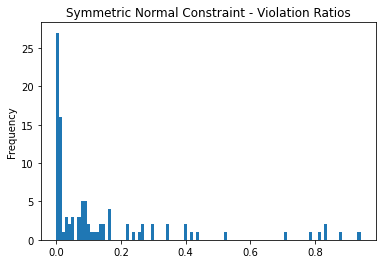

In [10]:
invConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

In [11]:
pd.concat([invConstDF1, invConstDF2, invConstDF3]).to_csv('../../allConstraintsAnalysis/invConstDFAnalysis.csv')

### Find out time required

In [55]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("invConst_Validator_new3"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/122 [00:00<?, ?it/s]

In [56]:
print(pd.Series(times).describe())

count    110.000000
mean       7.526318
std       11.686634
min        1.519000
25%        2.624000
50%        3.298500
75%        6.463250
max       80.846000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for symmetric constraint checks')

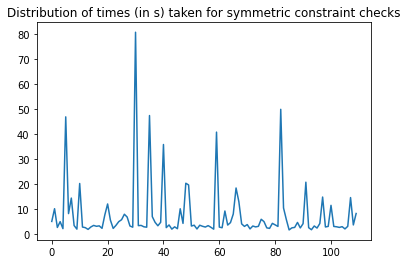

In [57]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for symmetric constraint checks")

# Combine Plots for constraints

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

typeConstDF = pd.read_csv("../../allConstraintsAnalysis/typeConstDFAnalysis.csv")
typeConstDF = typeConstDF.set_index(typeConstDF.iloc[:, 0])

valTypeConstDF = pd.read_csv("../../allConstraintsAnalysis/valueTypeConstDFAnalysis.csv")
valTypeConstDF = valTypeConstDF.set_index(valTypeConstDF.iloc[:, 0])

codepConstDF1 = pd.read_csv("../../allConstraintsAnalysis/codepConstDFAnalysis.csv")
codepConstDF1 = codepConstDF1.set_index(codepConstDF1.iloc[:, 0])

symmConstDF = pd.read_csv("../../allConstraintsAnalysis/symmConstDFAnalysis.csv")
symmConstDF = symmConstDF.set_index(symmConstDF.iloc[:, 0])

invConstDF = pd.read_csv("../../allConstraintsAnalysis/invConstDFAnalysis.csv")
invConstDF = invConstDF.set_index(invConstDF.iloc[:, 0])

In [14]:
typeConstDF1 = typeConstDF.add_suffix("_type_const")['violation_ratio_type_const'].rename().sort_values()

In [15]:
valTypeConstDF1 = valTypeConstDF.add_suffix("_valuetype_const")['violation_ratio_valuetype_const'].sort_values()

In [16]:
codepConstDF1_1 = codepConstDF1.add_suffix("_codep_const")['violation_ratio_codep_const'].sort_values()

In [17]:
symmConstDF1_1 = symmConstDF.add_suffix("_symm_const")['violation_ratio_symm_const'].sort_values()

In [18]:
invConstDF1_1 = invConstDF.add_suffix("_inv_const")['violation_ratio_inv_const'].sort_values()

In [7]:
invConstDF1_1.head()

Unnamed: 0
P1605    0.940000
P3448    0.879346
P925     0.833333
P926     0.833333
P1029    0.810908
Name: violation_ratio_inv_const, dtype: float64

In [19]:
typeConstDF1.index.names = ['property']
typeConstDF1 = typeConstDF1.reset_index().reset_index()
typeConstDF1['index'] = typeConstDF1['index'].apply(lambda p: (p+1) * 100/len(typeConstDF1))
typeConstDF1 = typeConstDF1.set_index('index')[0]

In [21]:
valTypeConstDF1.index.names = ['property']
valTypeConstDF1 = valTypeConstDF1.reset_index().reset_index()
valTypeConstDF1['index'] = valTypeConstDF1['index'].apply(lambda p: (p+1) * 100/len(valTypeConstDF1))
valTypeConstDF1 = valTypeConstDF1.set_index('index')['violation_ratio_valuetype_const']

In [22]:
codepConstDF1_1.index.names = ['property']
codepConstDF1_1 = codepConstDF1_1.reset_index().reset_index()
codepConstDF1_1['index'] = codepConstDF1_1['index'].apply(lambda p: (p+1) * 100/len(codepConstDF1_1))
codepConstDF1_1 = codepConstDF1_1.set_index('index')['violation_ratio_codep_const']

In [23]:
symmConstDF1_1.index.names = ['property']
symmConstDF1_1 = symmConstDF1_1.reset_index().reset_index()
symmConstDF1_1['index'] = symmConstDF1_1['index'].apply(lambda p: (p+1) * 100/len(symmConstDF1_1))
symmConstDF1_1 = symmConstDF1_1.set_index('index')['violation_ratio_symm_const']

In [24]:
invConstDF1_1.index.names = ['property']
invConstDF1_1 = invConstDF1_1.reset_index().reset_index()
invConstDF1_1['index'] = invConstDF1_1['index'].apply(lambda p: (p+1) * 100/len(invConstDF1_1))
invConstDF1_1 = invConstDF1_1.set_index('index')['violation_ratio_inv_const']

In [29]:
typeConstDF2 = [np.percentile(typeConstDF1,i)*100 for i in range(1, 101)]
valTypeConstDF2 = [np.percentile(valTypeConstDF1,i)*100 for i in range(1, 101)]
codepConstDF1_2 = [np.percentile(codepConstDF1_1,i)*100 for i in range(1, 101)]
symmConstDF1_2 = [np.percentile(symmConstDF1_1,i)*100 for i in range(1, 101)]
invConstDF1_2 = [np.percentile(invConstDF1_1,i)*100 for i in range(1, 101)]

In [30]:
constAnalysisDF = pd.DataFrame({'index':list(range(1, 101)), 'type': typeConstDF2, 'value type': valTypeConstDF2, 'irs': codepConstDF1_2, 'symmetric': symmConstDF1_2, 'inverse': invConstDF1_2})

In [31]:
constAnalysisDF = constAnalysisDF.melt('index', var_name='constraint',  value_name='VR')

In [32]:
constAnalysisDF.head()

,index,constraint,VR
0,1,type,0.0
1,2,type,0.0
2,3,type,0.0
3,4,type,0.0
4,5,type,0.0


[Text(0.5, 0, 'Proportion of properties (in %)'),
 Text(0, 0.5, 'Violation Ratio (in %)')]

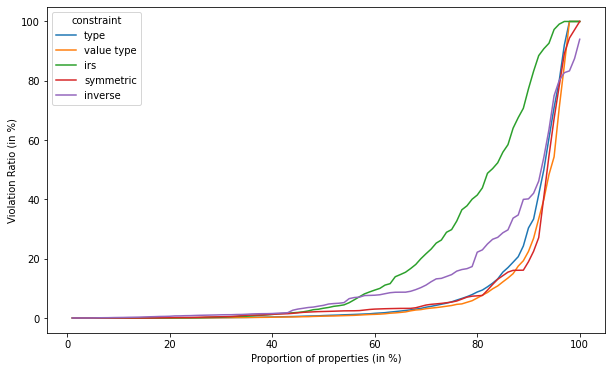

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='index', y='VR', hue='constraint', data=constAnalysisDF)
ax.set(xlabel="Proportion of properties (in %)", ylabel = "Violation Ratio (in %)")

## Option 2

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

typeConstDF = pd.read_csv("../../allConstraintsAnalysis/typeConstDFAnalysis.csv")
typeConstDF = typeConstDF.set_index(typeConstDF.iloc[:, 0])

valTypeConstDF = pd.read_csv("../../allConstraintsAnalysis/valueTypeConstDFAnalysis.csv")
valTypeConstDF = valTypeConstDF.set_index(valTypeConstDF.iloc[:, 0])

codepConstDF1 = pd.read_csv("../../allConstraintsAnalysis/codepConstDFAnalysis.csv")
codepConstDF1 = codepConstDF1.set_index(codepConstDF1.iloc[:, 0])

symmConstDF = pd.read_csv("../../allConstraintsAnalysis/symmConstDFAnalysis.csv")
symmConstDF = symmConstDF.set_index(symmConstDF.iloc[:, 0])

invConstDF = pd.read_csv("../../allConstraintsAnalysis/invConstDFAnalysis.csv")
invConstDF = invConstDF.set_index(invConstDF.iloc[:, 0])

In [114]:
typeConstDF1 = typeConstDF.add_suffix("_type_const")[['violation_ratio_type_const']].sort_values(by=['violation_ratio_type_const'],ascending=False)

In [115]:
valTypeConstDF1 = valTypeConstDF.add_suffix("_valuetype_const")[['violation_ratio_valuetype_const']].sort_values(by=['violation_ratio_valuetype_const'],ascending=False)

In [116]:
codepConstDF1_1 = codepConstDF1.add_suffix("_codep_const")[['violation_ratio_codep_const']].sort_values(by=['violation_ratio_codep_const'],ascending=False)

In [117]:
symmConstDF1_1 = symmConstDF.add_suffix("_symm_const")[['violation_ratio_symm_const']].sort_values(by=['violation_ratio_symm_const'],ascending=False)

In [118]:
invConstDF1_1 = invConstDF.add_suffix("_inv_const")[['violation_ratio_inv_const']].sort_values(by=['violation_ratio_inv_const'],ascending=False)

In [119]:
invConstDF1_1.head()

,violation_ratio_inv_const
Unnamed: 0,
P1605,0.940000
P3448,0.879346
P925,0.833333
P926,0.833333
P1029,0.810908


In [147]:
len(typeConstDF1), len(valTypeConstDF1), len(codepConstDF1_1), len(symmConstDF), len(invConstDF1_1)

(1456, 897, 527, 38, 110)

In [120]:
typeConstDF1.index.names = ['property']
typeConstDF1 = typeConstDF1.reset_index()[['violation_ratio_type_const']]

In [121]:
valTypeConstDF1.index.names = ['property']
valTypeConstDF1 = valTypeConstDF1.reset_index()[['violation_ratio_valuetype_const']]

In [122]:
codepConstDF1_1.index.names = ['property']
codepConstDF1_1 = codepConstDF1_1.reset_index()[['violation_ratio_codep_const']]

In [123]:
symmConstDF1_1.index.names = ['property']
symmConstDF1_1 = symmConstDF1_1.reset_index()[['violation_ratio_symm_const']]

In [124]:
invConstDF1_1.index.names = ['property']
invConstDF1_1 = invConstDF1_1.reset_index()[['violation_ratio_inv_const']]

In [125]:
typeConstDF2 = [np.percentile(typeConstDF1,i)*100 for i in range(1, 101)]
valTypeConstDF2 = [np.percentile(valTypeConstDF1,i)*100 for i in range(1, 101)]
codepConstDF1_2 = [np.percentile(codepConstDF1_1,i)*100 for i in range(1, 101)]
symmConstDF1_2 = [np.percentile(symmConstDF1_1,i)*100 for i in range(1, 101)]
invConstDF1_2 = [np.percentile(invConstDF1_1,i)*100 for i in range(1, 101)]

In [149]:
constAnalysisDF = pd.DataFrame({'index':list(range(100, 0, -1)), 'type': typeConstDF2, 'value type': valTypeConstDF2, 'irs': codepConstDF1_2, 'symmetric': symmConstDF1_2, 'inverse': invConstDF1_2})

In [150]:
constAnalysisDF.head()

,index,type,value type,irs,symmetric,inverse
0,100,0.0,0.0,0.0,0.0,0.000000
1,99,0.0,0.0,0.0,0.0,0.000000
2,98,0.0,0.0,0.0,0.0,0.000000
3,97,0.0,0.0,0.0,0.0,0.001924
4,96,0.0,0.0,0.0,0.0,0.010648


In [151]:
# constAnalysisDF = typeConstDF1.join(valTypeConstDF1).join(codepConstDF1_1).join(symmConstDF1_1).join(invConstDF1_1).rename(columns={'violation_ratio_type_const':'type', 'violation_ratio_valuetype_const': 'value type', 'violation_ratio_codep_const': 'irs', 'violation_ratio_symm_const': 'symmetric', 'violation_ratio_inv_const': 'inverse'}).reset_index()

In [152]:
constAnalysisDF = constAnalysisDF.melt('index', var_name='constraint',  value_name='VR')

In [153]:
def getSizes(row):
    map1 = {'type': 1456, 'value type': 897, 'irs': 527, 'symmetric': 38, 'inverse':110}
    return map1[row['constraint']]
constAnalysisDF['len'] = constAnalysisDF.apply(getSizes, axis=1)

In [154]:
# constAnalysisDF['VR'] *= 100

In [155]:
constAnalysisDF.head()

,index,constraint,VR,len
0,100,type,0.0,1456
1,99,type,0.0,1456
2,98,type,0.0,1456
3,97,type,0.0,1456
4,96,type,0.0,1456


[Text(0.5, 0, 'Properties'),
 Text(0, 0.5, 'Violation Ratio (in %)'),
 [Text(-20.0, 0, ''),
  Text(0.0, 0, ''),
  Text(20.0, 0, ''),
  Text(40.0, 0, ''),
  Text(60.0, 0, ''),
  Text(80.0, 0, ''),
  Text(100.0, 0, ''),
  Text(120.0, 0, '')]]

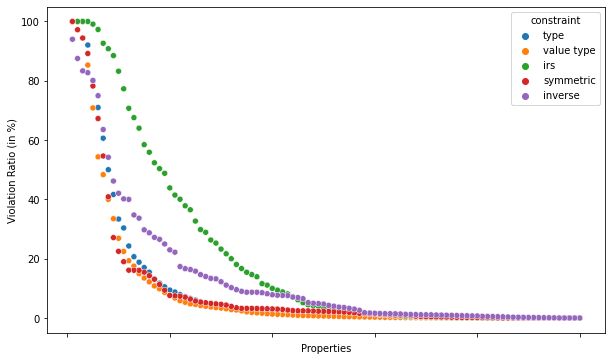

In [162]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='index',y='VR',hue='constraint',data=constAnalysisDF)
ax.set(xlabel="Properties", ylabel = "Violation Ratio (in %)",xticklabels=[])
# h,l = ax.get_legend_handles_labels()
# plt.legend(h[0:3],l[0:3],bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., fontsize=13)
# plt.show(ax)

## Option 3

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

typeConstDF = pd.read_csv("../../allConstraintsAnalysis/typeConstDFAnalysis.csv")
typeConstDF = typeConstDF.set_index(typeConstDF.iloc[:, 0])

valTypeConstDF = pd.read_csv("../../allConstraintsAnalysis/valueTypeConstDFAnalysis.csv")
valTypeConstDF = valTypeConstDF.set_index(valTypeConstDF.iloc[:, 0])

codepConstDF1 = pd.read_csv("../../allConstraintsAnalysis/codepConstDFAnalysis.csv")
codepConstDF1 = codepConstDF1.set_index(codepConstDF1.iloc[:, 0])

symmConstDF = pd.read_csv("../../allConstraintsAnalysis/symmConstDFAnalysis.csv")
symmConstDF = symmConstDF.set_index(symmConstDF.iloc[:, 0])

invConstDF = pd.read_csv("../../allConstraintsAnalysis/invConstDFAnalysis.csv")
invConstDF = invConstDF.set_index(invConstDF.iloc[:, 0])

In [4]:
typeConstDF1 = typeConstDF.add_suffix("_type_const")[['violation_ratio_type_const']].sort_values(by=['violation_ratio_type_const'],ascending=False)

In [5]:
valTypeConstDF1 = valTypeConstDF.add_suffix("_valuetype_const")[['violation_ratio_valuetype_const']].sort_values(by=['violation_ratio_valuetype_const'],ascending=False)

In [6]:
codepConstDF1_1 = codepConstDF1.add_suffix("_codep_const")[['violation_ratio_codep_const']].sort_values(by=['violation_ratio_codep_const'],ascending=False)

In [7]:
symmConstDF1_1 = symmConstDF.add_suffix("_symm_const")[['violation_ratio_symm_const']].sort_values(by=['violation_ratio_symm_const'],ascending=False)

In [8]:
invConstDF1_1 = invConstDF.add_suffix("_inv_const")[['violation_ratio_inv_const']].sort_values(by=['violation_ratio_inv_const'],ascending=False)

In [9]:
invConstDF1_1.head()

,violation_ratio_inv_const
Unnamed: 0,
P1605,0.940000
P3448,0.879346
P925,0.833333
P926,0.833333
P1029,0.810908


In [10]:
len(typeConstDF1), len(valTypeConstDF1), len(codepConstDF1_1), len(symmConstDF), len(invConstDF1_1)

(1456, 897, 527, 38, 110)

In [11]:
typeConstDF1.index.names = ['property']
typeConstDF1 = typeConstDF1.reset_index()[['violation_ratio_type_const']]

In [12]:
valTypeConstDF1.index.names = ['property']
valTypeConstDF1 = valTypeConstDF1.reset_index()[['violation_ratio_valuetype_const']]

In [13]:
codepConstDF1_1.index.names = ['property']
codepConstDF1_1 = codepConstDF1_1.reset_index()[['violation_ratio_codep_const']]

In [14]:
symmConstDF1_1.index.names = ['property']
symmConstDF1_1 = symmConstDF1_1.reset_index()[['violation_ratio_symm_const']]

In [15]:
invConstDF1_1.index.names = ['property']
invConstDF1_1 = invConstDF1_1.reset_index()[['violation_ratio_inv_const']]

In [47]:
import numpy as np

typeConstDF2 = pd.DataFrame({'index': list(np.arange(100, 1, -0.05)), 'type': [np.percentile(typeConstDF1,i)*100 for i in np.arange(1, 100,0.05)]}).set_index('index')
valTypeConstDF2 = pd.DataFrame({'index': list(np.arange(100, 1, -0.1)), 'value type': [np.percentile(valTypeConstDF1,i)*100 for i in np.arange(1, 100, 0.1)]}).set_index('index')
codepConstDF1_2 = pd.DataFrame({'index': list(np.arange(100, 1, -0.5)), 'irs': [np.percentile(codepConstDF1_1,i)*100 for i in np.arange(1, 100, 0.5)]}).set_index('index')
symmConstDF1_2 = pd.DataFrame({'index': list(np.arange(100, 1, -5)), 'symmetric': [np.percentile(symmConstDF1_1,i)*100 for i in np.arange(1, 100,5)]}).set_index('index')
invConstDF1_2 = pd.DataFrame({'index': list(np.arange(100, 1, -1)), 'inverse': [np.percentile(invConstDF1_1,i)*100 for i in np.arange(1, 100,1)]}).set_index('index')

In [48]:
constAnalysisDF = typeConstDF2.join(valTypeConstDF2, how='outer').join(codepConstDF1_2, how='outer').join(symmConstDF1_2, how='outer').join(invConstDF1_2, how='outer')
constAnalysisDF = constAnalysisDF.reset_index()

In [49]:
# constAnalysisDF = typeConstDF1.join(valTypeConstDF1).join(codepConstDF1_1).join(symmConstDF1_1).join(invConstDF1_1).rename(columns={'violation_ratio_type_const':'type', 'violation_ratio_valuetype_const': 'value type', 'violation_ratio_codep_const': 'irs', 'violation_ratio_symm_const': 'symmetric', 'violation_ratio_inv_const': 'inverse'}).reset_index()

In [50]:
constAnalysisDF = constAnalysisDF.melt('index', var_name='constraint',  value_name='VR')

In [51]:
# def getSizes(row):
#     map1 = {'type': 1456, 'value type': 897, 'irs': 527, 'symmetric': 38, 'inverse':110}
#     return map1[row['constraint']]
# constAnalysisDF['len'] = constAnalysisDF.apply(getSizes, axis=1)

In [52]:
# constAnalysisDF['VR'] *= 100

In [53]:
constAnalysisDF.head()

,index,constraint,VR
0,1.05,type,100.0
1,1.10,type,100.0
2,1.15,type,100.0
3,1.20,type,100.0
4,1.25,type,100.0


[Text(0.5, 0, 'Properties'),
 Text(0, 0.5, 'Violation Ratio (in %)'),
 [Text(-20.0, 0, ''),
  Text(0.0, 0, ''),
  Text(20.0, 0, ''),
  Text(40.0, 0, ''),
  Text(60.0, 0, ''),
  Text(80.0, 0, ''),
  Text(100.0, 0, ''),
  Text(120.0, 0, '')]]

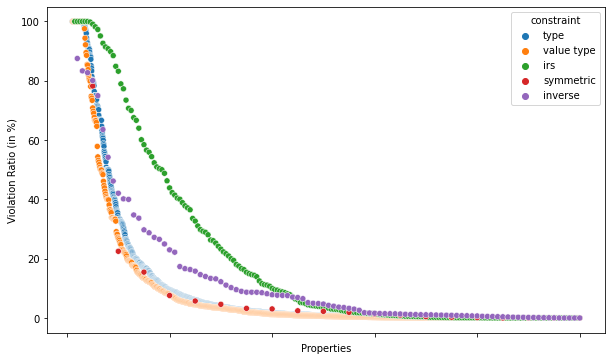

In [54]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='index',y='VR',hue='constraint',data=constAnalysisDF)
ax.set(xlabel="Properties", ylabel = "Violation Ratio (in %)",xticklabels=[])
# h,l = ax.get_legend_handles_labels()
# plt.legend(h[0:3],l[0:3],bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0., fontsize=13)
# plt.show(ax)

## Option 4

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

typeConstDF = pd.read_csv("../../allConstraintsAnalysis/typeConstDFAnalysis.csv")
typeConstDF = typeConstDF.set_index(typeConstDF.iloc[:, 0])

valTypeConstDF = pd.read_csv("../../allConstraintsAnalysis/valueTypeConstDFAnalysis.csv")
valTypeConstDF = valTypeConstDF.set_index(valTypeConstDF.iloc[:, 0])

codepConstDF1 = pd.read_csv("../../allConstraintsAnalysis/codepConstDFAnalysis.csv")
codepConstDF1 = codepConstDF1.set_index(codepConstDF1.iloc[:, 0])

symmConstDF = pd.read_csv("../../allConstraintsAnalysis/symmConstDFAnalysis.csv")
symmConstDF = symmConstDF.set_index(symmConstDF.iloc[:, 0])

invConstDF = pd.read_csv("../../allConstraintsAnalysis/invConstDFAnalysis.csv")
invConstDF = invConstDF.set_index(invConstDF.iloc[:, 0])

In [77]:
typeConstDF

,Unnamed: 0,correct,incorrect,paths,violation_ratio,total
Unnamed: 0,,,,,,
P742,P742,48903,89,['../../allConstraintsAnalysis/typeConstraint_...,0.001817,48992
P2663,P2663,554,7,['../../allConstraintsAnalysis/typeConstraint_...,0.012478,561
P5105,P5105,1919,95,['../../allConstraintsAnalysis/typeConstraint_...,0.047170,2014
P6938,P6938,3,2,['../../allConstraintsAnalysis/typeConstraint_...,0.400000,5
P3179,P3179,5052,13,['../../allConstraintsAnalysis/typeConstraint_...,0.002567,5065
...,...,...,...,...,...,...
P1072,P1072,5263,123,['../../allConstraintsAnalysis/typeConstraint_...,0.022837,5386
P1073,P1073,2263,22,['../../allConstraintsAnalysis/typeConstraint_...,0.009628,2285
P16,P16,49781,238,['../../allConstraintsAnalysis/typeConstraint_...,0.004758,50019


In [78]:
typeConstDF1 = typeConstDF.add_suffix("_type_const")[['violation_ratio_type_const','incorrect_type_const']].sort_values(by=['violation_ratio_type_const'],ascending=False)

In [80]:
valTypeConstDF1 = valTypeConstDF.add_suffix("_valuetype_const")[['violation_ratio_valuetype_const','incorrect_valuetype_const']].sort_values(by=['violation_ratio_valuetype_const'],ascending=False)

In [81]:
codepConstDF1_1 = codepConstDF1.add_suffix("_codep_const")[['violation_ratio_codep_const','incorrect_codep_const']].sort_values(by=['violation_ratio_codep_const'],ascending=False)

In [83]:
symmConstDF1_1 = symmConstDF.add_suffix("_symm_const")[['violation_ratio_symm_const','incorrect_symm_const']].sort_values(by=['violation_ratio_symm_const'],ascending=False)

In [84]:
invConstDF1_1 = invConstDF.add_suffix("_inv_const")[['violation_ratio_inv_const','incorrect_inv_const']].sort_values(by=['violation_ratio_inv_const'],ascending=False)

In [85]:
invConstDF1_1.head()

,violation_ratio_inv_const,incorrect_inv_const
Unnamed: 0,,
P1605,0.940000,188
P3448,0.879346,4249
P925,0.833333,5
P926,0.833333,5
P1029,0.810908,2037


In [86]:
typeConstDF1.index.names = ['property']
typeConstDF1 = typeConstDF1.reset_index()[['violation_ratio_type_const','incorrect_type_const']]

In [87]:
valTypeConstDF1.index.names = ['property']
valTypeConstDF1 = valTypeConstDF1.reset_index()[['violation_ratio_valuetype_const','incorrect_valuetype_const']]

In [88]:
codepConstDF1_1.index.names = ['property']
codepConstDF1_1 = codepConstDF1_1.reset_index()[['violation_ratio_codep_const','incorrect_codep_const']]

In [89]:
symmConstDF1_1.index.names = ['property']
symmConstDF1_1 = symmConstDF1_1.reset_index()[['violation_ratio_symm_const','incorrect_symm_const']]

In [90]:
invConstDF1_1.index.names = ['property']
invConstDF1_1 = invConstDF1_1.reset_index()[['violation_ratio_inv_const','incorrect_inv_const']]

In [102]:
constAnalysisDF = typeConstDF1.join(valTypeConstDF1).join(codepConstDF1_1).join(symmConstDF1_1).join(invConstDF1_1).rename(columns={'violation_ratio_type_const':'type', 'violation_ratio_valuetype_const': 'value type', 'violation_ratio_codep_const': 'irs', 'violation_ratio_symm_const': 'symmetric', 'violation_ratio_inv_const': 'inverse'}).reset_index()

In [103]:
constAnalysisDF

,index,type,incorrect_type_const,value type,incorrect_valuetype_const,irs,incorrect_codep_const,symmetric,incorrect_symm_const,inverse,incorrect_inv_const
0,0,1.0,4,1.0,1369.0,1.0,1.0,1.000000,2.0,0.940000,188.0
1,1,1.0,4,1.0,5.0,1.0,8.0,0.924528,49.0,0.879346,4249.0
2,2,1.0,1,1.0,13.0,1.0,1.0,0.628133,777.0,0.833333,5.0
3,3,1.0,3,1.0,3.0,1.0,1.0,0.256228,144.0,0.833333,5.0
4,4,1.0,64,1.0,12.0,1.0,42211.0,0.161220,1919.0,0.810908,2037.0


In [105]:
constAnalysisDF = constAnalysisDF.melt('index', var_name='constraint',  value_name='VR')

In [98]:
constAnalysisDF['VR'] *= 100

In [106]:
constAnalysisDF

,index,constraint,VR
0,0,type,1.0
1,1,type,1.0
2,2,type,1.0
3,3,type,1.0
4,4,type,1.0
...,...,...,...
14555,1451,incorrect_inv_const,NaN
14556,1452,incorrect_inv_const,NaN
14557,1453,incorrect_inv_const,NaN
14558,1454,incorrect_inv_const,NaN


[Text(0.5, 0, 'Properties'),
 Text(0, 0.5, 'Violation Ratio (in %)'),
 [Text(-200.0, 0, ''),
  Text(0.0, 0, ''),
  Text(200.0, 0, ''),
  Text(400.0, 0, ''),
  Text(600.0, 0, ''),
  Text(800.0, 0, ''),
  Text(1000.0, 0, ''),
  Text(1200.0, 0, ''),
  Text(1400.0, 0, ''),
  Text(1600.0, 0, '')]]

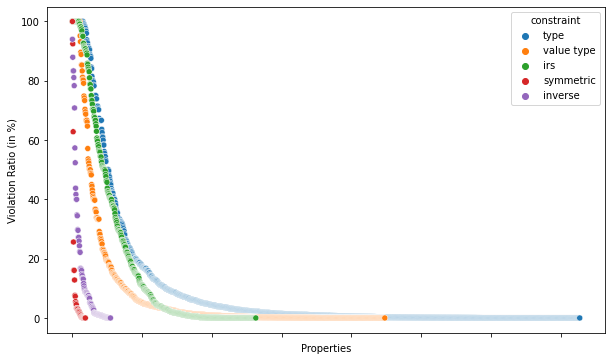

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='index',y='VR',hue='constraint',data=constAnalysisDF)
ax.set(xlabel="Properties", ylabel = "Violation Ratio (in %)",xticklabels=[])

# Analysis on properties with constraints

In [26]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->()" \
    -o ../../constraintsOP/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-04-03 09:14:12 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
  PARAS: ['P2302']
---------------------------------------------


In [39]:
!kgtk unique -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz --column node1 -o ../../constraintsOP/claims.propList.tsv

In [42]:
!head ../../constraintsOP/claims.propList.tsv

node1	label	node2
P10	count	17
P1000	count	10
P1001	count	26
P1002	count	9
P1003	count	20
P1004	count	33
P1005	count	21
P1006	count	26
P1007	count	19


In [43]:
import pandas as pd
import os
props = pd.read_csv("../../constraintsOP/claims.constraints_list.tsv", sep='\t')

In [44]:
props2 = props.groupby(['node1']).node2.apply(list)

In [45]:
len(props2)

8100

In [48]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2336, 8100)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object

In [32]:
import pandas as pd
import os
props2 = pd.read_csv("../../constraintsOP/claims.propList.tsv", sep='\t')

In [33]:
props2 = props2.groupby(['node1']).node2.apply(list)

In [34]:
len(props2)

8193

In [35]:
cnt = 0
totalCnt = 0
for prop in props2.index:
    totalCnt += 1
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    else:
        cnt += 1
cnt, totalCnt

(2415, 8193)

In [50]:
props2.head(500)

node1
P10      [Q21502404, Q21510851, Q21510852, Q52004125, Q...
P1000                    [Q21510856, Q21510865, Q53869507]
P1001         [Q21502838, Q21503250, Q21510865, Q25796498]
P1002                               [Q21503250, Q21510865]
P1003    [Q19474404, Q21502404, Q21502410, Q21510851, Q...
                               ...                        
P1563    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1564    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1565    [Q19474404, Q21502404, Q21502410, Q21503247, Q...
P1566    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
P1567    [Q19474404, Q21502404, Q21502410, Q21502838, Q...
Name: node2, Length: 500, dtype: object